<a href="https://colab.research.google.com/github/Harshnagwani123/ML_TRAINING/blob/main/KMeans_%26_Agglomerative_on_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Day 6 — Clustering: Customer Segmentation
# Dataset: Mall_Customers.csv (Kaggle dataset)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [6]:
# 1) Load dataset

df = pd.read_csv("/content/Mall_Customers.csv")

In [7]:
# Select relevant features (Income & Spending Score)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [8]:
# 2) Standardize (important for clustering)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# 3) KMeans Clustering

kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [10]:
# Add cluster labels to dataset
df["Cluster_KMeans"] = y_kmeans


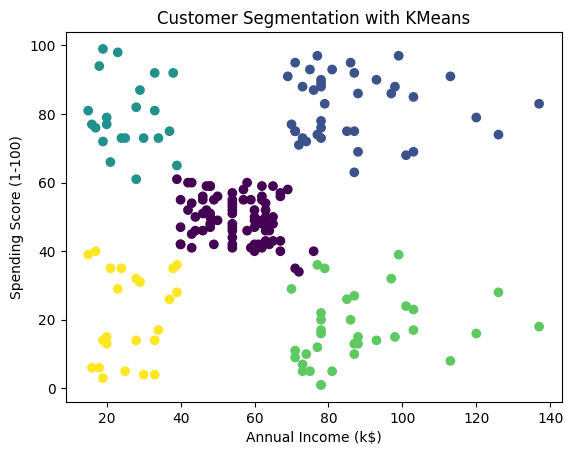

In [11]:
# Plot clusters
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_kmeans, cmap="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation with KMeans")
plt.show()

In [12]:
# 4) Agglomerative Clustering

agg = AgglomerativeClustering(n_clusters=5, linkage="ward")
y_agg = agg.fit_predict(X_scaled)

df["Cluster_Agglo"] = y_agg

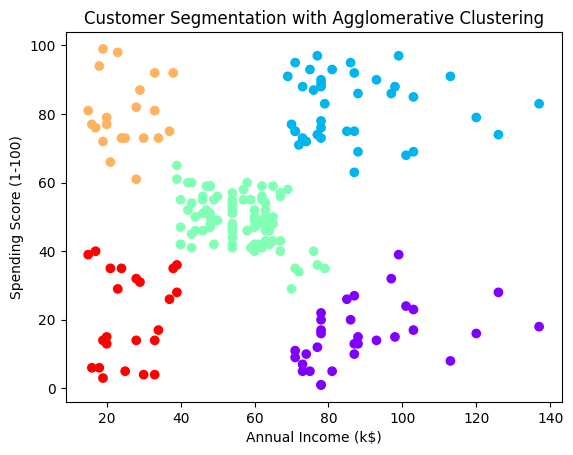

In [13]:
# Plot clusters
plt.scatter(X["Annual Income (k$)"], X["Spending Score (1-100)"], c=y_agg, cmap="rainbow")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation with Agglomerative Clustering")
plt.show()




In [14]:
# 5) Cluster Summary

print(df.groupby("Cluster_KMeans")[["Annual Income (k$)", "Spending Score (1-100)"]].mean())

                Annual Income (k$)  Spending Score (1-100)
Cluster_KMeans                                            
0                        55.296296               49.518519
1                        86.538462               82.128205
2                        25.727273               79.363636
3                        88.200000               17.114286
4                        26.304348               20.913043
